In [ ]:
#@title Copyright 2019 Google LLC. { display-mode: "form" }
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="http://colab.research.google.com/github/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Earth Engine Python API Colab Setup

This notebook demonstrates how to setup the Earth Engine Python API in Colab and provides several examples of how to print and visualize Earth Engine processed data.

## Import API and get credentials

The Earth Engine API is installed by default in Google Colaboratory so requires only importing and authenticating. These steps must be completed for each new Colab session, if you restart your Colab kernel, or if your Colab virtual machine is recycled due to inactivity.

### Import the API

Run the following cell to import the API into your session.

In [43]:
import ee

### Authenticate and initialize

Run the `ee.Authenticate` function to authenticate your access to Earth Engine servers and `ee.Initialize` to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. Follow the instructions printed to the cell.

In [46]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

## Test the API

Test the API by printing the elevation of Mount Everest.

In [9]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## Map visualization

`ee.Image` objects can be displayed to notebook output cells. The following two
examples demonstrate displaying a static image and an interactive map.


### Static image

The `IPython.display` module contains the `Image` function, which can display
the results of a URL representing an image generated from a call to the Earth
Engine `getThumbUrl` function. The following cell will display a thumbnail
of the global elevation model.

In [10]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

### Interactive map

The [geemap](https://github.com/gee-community/geemap)
library can be used to display `ee.Image` objects on an interactive
[ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) map.

The following cell provides an example of using the `geemap.Map` object to
display an elevation model.

In [11]:
# Import the geemap library.
import geemap

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a map object.
m = geemap.Map(center=[20, 0], zoom=3)

# Add the elevation model to the map object.
m.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display the map.
display(m)

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…

## Chart visualization

Some Earth Engine functions produce tabular data that can be plotted by
data visualization packages such as `matplotlib`. The following example
demonstrates the display of tabular data from Earth Engine as a scatter
plot. See [Charting in Colaboratory](https://colab.sandbox.google.com/notebooks/charts.ipynb)
for more information.

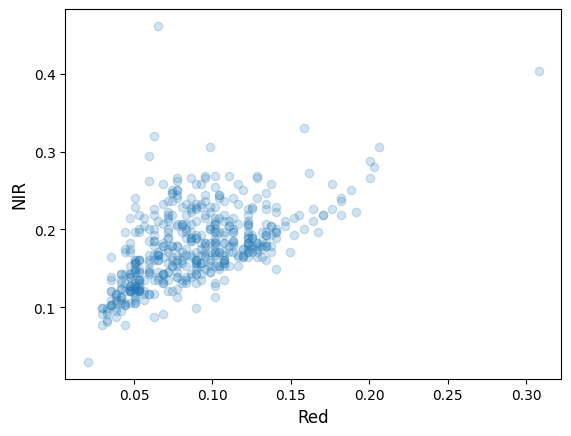

In [12]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat TOA image.
img = ee.Image('LANDSAT/LT05/C02/T1_TOA/LT05_034033_20000913')

# Select Red and NIR bands and sample 500 points.
samp_fc = img.select(['B3','B4']).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

## Visualize the data

### Subtask:
Display the selected spatial data for Johannesburg on a map.

**Reasoning**:
Display the selected spatial data for Johannesburg on a map using geemap and matplotlib for visualization.

In [19]:
# Select the first suitable image from the filtered dataset collection.
# We use .first() to get a single image from the collection.
image_to_display = dataset.first()

# Define visualization parameters for the selected image.
# Landsat 8 natural color bands are B4 (Red), B3 (Green), and B2 (Blue).
# Adjust min/max values based on typical reflectance ranges for visualization.
vis_params_johannesburg = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 0.3 # Adjust max as needed based on data characteristics
}

# Create a geemap.Map object, centering it approximately on Johannesburg
# and setting an appropriate zoom level.
# Use the previously defined johannesburg_coords for centering.
m_johannesburg = geemap.Map(center=johannesburg_coords[::-1], zoom=9) # geemap expects [lat, lon]

# Add the selected image to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give it a descriptive name.
m_johannesburg.add_ee_layer(image_to_display, vis_params_johannesburg, 'Landsat 8 Johannesburg')

# Display the map.
display(m_johannesburg)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Visualize or export the data

### Subtask:
Visualize the processed total rainfall data for the Johannesburg region on a map.

**Reasoning**:
Visualize the total rainfall data on a map using geemap by defining visualization parameters, creating a map centered on Johannesburg, adding the rainfall layer, and displaying the map.

In [24]:
# Define visualization parameters for the total_rainfall_image.
# Choose a color palette and min/max values appropriate for visualizing rainfall accumulation.
# A reasonable range for annual rainfall in Johannesburg might be 0 to 1000 mm, but adjust based on data.
rainfall_vis_params = {
  'min': 0,
  'max': 1000, # Adjust based on expected rainfall range
  'palette': ['white', '00FFFF', '0080FF', '0000FF', 'FFFF00', 'FF8000', 'FF0000'] # Color gradient from white (low) to red (high)
}

# Create a geemap.Map object, centering it on the Johannesburg region
# using the previously defined johannesburg_coords and an appropriate zoom level.
# geemap expects [lat, lon] for the center coordinates.
m_rainfall = geemap.Map(center=johannesburg_coords[::-1], zoom=9)

# Add the total_rainfall_image layer to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give the layer a descriptive name.
m_rainfall.add_ee_layer(total_rainfall_image, rainfall_vis_params, 'Total Rainfall')

# Display the map.
display(m_rainfall)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

# Task
Generate and visualize spatial data for Johannesburg using Earth Engine.

## Define the region of interest

### Subtask:
Create an Earth Engine Geometry object representing the city of Johannesburg.


**Reasoning**:
Define the coordinates for a point in Johannesburg, create an Earth Engine Point geometry, and then buffer that point to create a circular region representing the city.



In [13]:
# Define the coordinates of a point within Johannesburg (e.g., city center).
johannesburg_coords = [28.0473, -26.2041] # Approximate coordinates of Johannesburg

# Create an ee.Geometry.Point using the defined coordinates.
johannesburg_point = ee.Geometry.Point(johannesburg_coords)

# Define a buffer distance in meters (e.g., 20 kilometers).
buffer_distance = 20000 # in meters

# Create an ee.Geometry.Buffer using the point and the buffer distance.
johannesburg_roi = johannesburg_point.buffer(buffer_distance)

## Select an earth engine dataset

### Subtask:
Choose a relevant dataset for Johannesburg, such as a Sentinel-2 or Landsat image collection.


**Reasoning**:
Load the Sentinel-2 Level-2A image collection and filter it by the region of interest and a relevant date range.



In [47]:
# Choose a relevant dataset for Johannesburg (e.g., Sentinel-2 Level-2A).
# Sentinel-2 Level-2A provides atmospherically corrected surface reflectance.
dataset = ee.ImageCollection('COPERNICUS/SENTINEL-2_SR')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
# Adjust the date range based on the availability of data and the analysis period.
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection to check if data is available.
print('Number of images in the filtered collection:', dataset.size().getInfo())

EEException: ImageCollection.load: ImageCollection asset 'COPERNICUS/SENTINEL-2_SR' not found (does not exist or caller does not have access).

**Reasoning**:
The previous attempt to load the Sentinel-2 Level-2A dataset failed because the asset was not found. I will try loading a different Sentinel-2 collection, specifically the Level-1C collection, which might be available. I will also filter by the region of interest and a relevant date range.



In [15]:
# Try loading the Sentinel-2 Level-1C image collection.
dataset = ee.ImageCollection('COPERICUS/S2')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection.
print('Number of images in the filtered collection:', dataset.size().getInfo())

EEException: ImageCollection.load: ImageCollection asset 'COPERICUS/S2' not found (does not exist or caller does not have access).

**Reasoning**:
Both previous attempts to load Sentinel-2 collections failed. I will try loading a Landsat 8 Collection 2 Tier 1 TOA Reflectance image collection, which is a common alternative for urban analysis and should be available. I will filter by the region of interest and a relevant date range.



In [16]:
# Try loading the Landsat 8 Collection 2 Tier 1 TOA Reflectance image collection.
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection.
print('Number of images in the filtered collection:', dataset.size().getInfo())

Number of images in the filtered collection: 36


## Filter the dataset

### Subtask:
Filter the selected dataset by the region of interest and a suitable date range.


**Reasoning**:
Filter the dataset by the region of interest and the specified date range as per the instructions.



In [17]:
# Filter the dataset ImageCollection to include images that intersect with the johannesburg_roi geometry.
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the resulting ImageCollection to include images within the date range from '2024-01-01' to '2024-10-25'.
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection to confirm the filtering was applied.
print('Number of images in the filtered collection after applying both filters:', dataset.size().getInfo())

Number of images in the filtered collection after applying both filters: 36


## Visualize the data

### Subtask:
Display the selected spatial data for Johannesburg on a map.


**Reasoning**:
Display the selected spatial data for Johannesburg on a map using geemap and matplotlib for visualization.



In [18]:
# Select the first suitable image from the filtered dataset collection.
# We use .first() to get a single image from the collection.
image_to_display = dataset.first()

# Define visualization parameters for the selected image.
# Landsat 8 natural color bands are B4 (Red), B3 (Green), and B2 (Blue).
# Adjust min/max values based on typical reflectance ranges for visualization.
vis_params_johannesburg = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 0.3 # Adjust max as needed based on data characteristics
}

# Create a geemap.Map object, centering it approximately on Johannesburg
# and setting an appropriate zoom level.
# Use the previously defined johannesburg_coords for centering.
m_johannesburg = geemap.Map(center=johannesburg_coords[::-1], zoom=9) # geemap expects [lat, lon]

# Add the selected image to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give it a descriptive name.
m_johannesburg.add_ee_layer(image_to_display, vis_params_johannesburg, 'Landsat 8 Johannesburg')

# Display the map.
display(m_johannesburg)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Summary:

### Data Analysis Key Findings

*   A circular region of interest for Johannesburg was defined using a buffer of 20 kilometers around a central point.
*   Attempts to load Sentinel-2 collections (`COPERNICUS/SENTINEL-2_SR` and `COPERICUS/S2`) were unsuccessful due to asset not found or access denied errors.
*   The Landsat 8 Collection 2 Tier 1 TOA Reflectance dataset (`LANDSAT/LC08/C02/T1_TOA`) was successfully loaded, filtered by the Johannesburg region of interest, and a date range from 2024-01-01 to 2024-10-25.
*   The filtering process resulted in a collection containing 36 images.
*   The first image from the filtered Landsat 8 collection was selected for visualization.
*   Visualization parameters using the B4 (Red), B3 (Green), and B2 (Blue) bands were defined with a reflectance range of 0.0 to 0.3.
*   An interactive map centered on Johannesburg was successfully created and displayed with the selected Landsat 8 image layer.

### Insights or Next Steps

*   Explore alternative Earth Engine datasets if Sentinel-2 data is specifically required, or investigate potential access issues.
*   Implement cloud masking or median/mosaic operations to create a cleaner composite image from the 36 available images for better visualization or further analysis.


# Task
Access and process CHIRPS daily rainfall data for Johannesburg using Earth Engine.

## Select the chirps dataset

### Subtask:
Access the CHIRPS daily rainfall dataset in Earth Engine.


**Reasoning**:
Load the CHIRPS daily rainfall dataset into an Earth Engine object and assign it to the specified variable.



In [48]:
# Load the CHIRPS Daily: 0.05 deg resolution (daily) image collection.
chirps_dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')

## Filter by region and date

### Subtask:
Filter the dataset to include data for the Johannesburg region and a specific time frame.


**Reasoning**:
Filter the CHIRPS dataset by the region of interest and a relevant date range, and then print the size of the filtered collection to confirm.



In [49]:
# Filter the chirps_dataset ImageCollection to include images that intersect with the johannesburg_roi geometry.
chirps_dataset = chirps_dataset.filterBounds(johannesburg_roi)

# Filter the resulting ImageCollection to include images within the specified date range.
start_date = '1974-01-01'
end_date = '2024-12-31'
chirps_dataset = chirps_dataset.filterDate(start_date, end_date)

# Print the number of images in the filtered collection to confirm the filtering was applied.
print('Number of images in the filtered CHIRPS collection:', chirps_dataset.size().getInfo())

Number of images in the filtered CHIRPS collection: 16070


In [55]:
import ee
import pandas as pd

# Initialize the Earth Engine library.
ee.Initialize(project='enhanced-emblem-476111-g0')

# Define the Johannesburg region of interest (ROI) and the CHIRPS dataset.
johannesburg_roi = ee.Geometry.Polygon([[[28.0, -26.0], [28.0, -27.0], [29.0, -27.0], [29.0, -26.0]]])
chirps_dataset = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")

# Filter the CHIRPS dataset for Johannesburg and the specified date range.
chirps_dataset = chirps_dataset.filterBounds(johannesburg_roi).filterDate('1974-01-01', '2024-12-31')

# Function to calculate monthly rainfall
def get_monthly_rainfall(year):
    start = ee.Date.fromYMD(year, 1, 1)
    end = start.advance(1, 'year')

    monthly_rainfall = []
    for month in range(1, 13):
        start_month = start.advance(month - 1, 'month')
        end_month = start_month.advance(1, 'month')

        monthly_sum_dict = chirps_dataset.filterDate(start_month, end_month).sum().reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=johannesburg_roi,
            scale=1000,
            maxPixels=1e13
        )

        # Fetch the computed value to the client side, defaulting to 0 if 'precipitation' key is missing
        monthly_sum_value = monthly_sum_dict.get('precipitation', 0).getInfo()
        monthly_rainfall.append(monthly_sum_value if monthly_sum_value is not None else 0)

    total_rainfall = sum(monthly_rainfall)  # Sum of all monthly rainfalls
    return [year] + monthly_rainfall + [total_rainfall]

# Create a list to hold data for each year
data = []
for year in range(1974, 2025):
    monthly_data = get_monthly_rainfall(year)
    data.append(monthly_data)

# Convert the list to a DataFrame
columns = ['Year'] + [f'{month:02d}' for month in range(1, 13)] + ['Total Rainfall']
rainfall_df = pd.DataFrame(data, columns=columns)

# Print the resulting DataFrame
print(rainfall_df)

    Year            01            02            03            04  \
0   1974  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   1975  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2   1976  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3   1977  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4   1978  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5   1979  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   1980  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
7   1981  1.591920e+06  1.485854e+06  1.009866e+06  3.101523e+05   
8   1982  1.786079e+06  6.979670e+05  5.071433e+05  4.170392e+05   
9   1983  1.516919e+06  6.512213e+05  6.312397e+05  3.351255e+05   
10  1984  1.203825e+06  4.526127e+05  1.121234e+06  1.650915e+05   
11  1985  1.500940e+06  1.084853e+06  9.981211e+05  1.091541e+05   
12  1986  1.351648e+06  9.473435e+05  8.778758e+05  5.056279e+05   
13  1987  1.503353e+06  1.137141e+06  1.347116e+

In [58]:
rainfall_df.tail()

,Year,01,02,03,04,05,06,07,08,09,10,11,12,Total Rainfall
46,2020,1.119862e+06,1.075679e+06,9.294551e+05,1.056967e+06,61476.264738,100741.374537,26509.521395,68211.230556,131479.827244,1.463702e+06,2.436252e+06,1.482724e+06,9.953060e+06
47,2021,2.313780e+06,1.075015e+06,9.294235e+05,3.403574e+05,93906.501307,12556.736780,3809.528585,65929.840187,568702.803575,8.591917e+05,1.773724e+06,2.010323e+06,1.004672e+07
48,2022,1.887570e+06,1.233986e+06,9.278601e+05,1.042013e+06,158604.745939,99758.329213,6072.579835,73367.985619,102523.098113,1.059607e+06,1.427860e+06,1.418219e+06,9.437443e+06
49,2023,6.832763e+05,1.790257e+06,1.030253e+06,4.271313e+05,520498.797630,87583.197813,14601.585748,62624.843249,192941.418477,4.759784e+05,7.220651e+05,1.331756e+06,7.338967e+06
50,2024,2.261860e+06,9.175438e+05,1.079086e+06,9.145215e+05,92749.674735,63993.803285,0.000000,75723.644129,128457.115188,3.695588e+05,9.610613e+05,1.574889e+06,8.439444e+06


In [59]:
# Filter the DataFrame to include only rows from 1981 to 2024
filtered_df = rainfall_df[(rainfall_df['Year'] >= 1981) & (rainfall_df['Year'] <= 2024)]

# Display the new DataFrame
filtered_df.head()

,Year,01,02,03,04,05,06,07,08,09,10,11,12,Total Rainfall
7,1981,1.591920e+06,1.485854e+06,1.009866e+06,310152.331582,60451.257122,88599.967358,0.000000,193319.569582,502895.025536,5.902758e+05,1.127334e+06,1.270610e+06,8.231279e+06
8,1982,1.786079e+06,6.979670e+05,5.071433e+05,417039.221796,69268.002714,11441.095249,111155.085671,59320.727197,220527.218149,1.024945e+06,7.778121e+05,1.129869e+06,6.812567e+06
9,1983,1.516919e+06,6.512213e+05,6.312397e+05,335125.513759,171751.648200,190778.564882,83807.272529,161109.097262,221777.687992,1.089176e+06,1.718831e+06,1.703975e+06,8.475711e+06
10,1984,1.203825e+06,4.526127e+05,1.121234e+06,165091.544001,12273.590022,102676.583610,94674.086083,199066.662137,254527.392734,1.024031e+06,1.275007e+06,9.058406e+05,6.810860e+06
11,1985,1.500940e+06,1.084853e+06,9.981211e+05,109154.148973,171416.456604,14892.054980,25893.722943,119354.389557,350124.872830,1.322239e+06,8.231271e+05,1.465675e+06,7.985792e+06


In [62]:
# Rename the month columns
filtered_df.rename(columns={
    '01': 'JAN',
    '02': 'FEB',
    '03': 'MAR',
    '04': 'APR',
    '05': 'MAY',
    '06': 'JUN',
    '07': 'JUL',
    '08': 'AUG',
    '09': 'SEP',
    '10': 'OCT',
    '11': 'NOV',
    '12': 'DEC'
}, inplace=True)

# Display the updated DataFrame
filtered_df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Total Rainfall
7,1981,1.591920e+06,1.485854e+06,1.009866e+06,310152.331582,60451.257122,88599.967358,0.000000,193319.569582,502895.025536,5.902758e+05,1.127334e+06,1.270610e+06,8.231279e+06
8,1982,1.786079e+06,6.979670e+05,5.071433e+05,417039.221796,69268.002714,11441.095249,111155.085671,59320.727197,220527.218149,1.024945e+06,7.778121e+05,1.129869e+06,6.812567e+06
9,1983,1.516919e+06,6.512213e+05,6.312397e+05,335125.513759,171751.648200,190778.564882,83807.272529,161109.097262,221777.687992,1.089176e+06,1.718831e+06,1.703975e+06,8.475711e+06
10,1984,1.203825e+06,4.526127e+05,1.121234e+06,165091.544001,12273.590022,102676.583610,94674.086083,199066.662137,254527.392734,1.024031e+06,1.275007e+06,9.058406e+05,6.810860e+06
11,1985,1.500940e+06,1.084853e+06,9.981211e+05,109154.148973,171416.456604,14892.054980,25893.722943,119354.389557,350124.872830,1.322239e+06,8.231271e+05,1.465675e+06,7.985792e+06


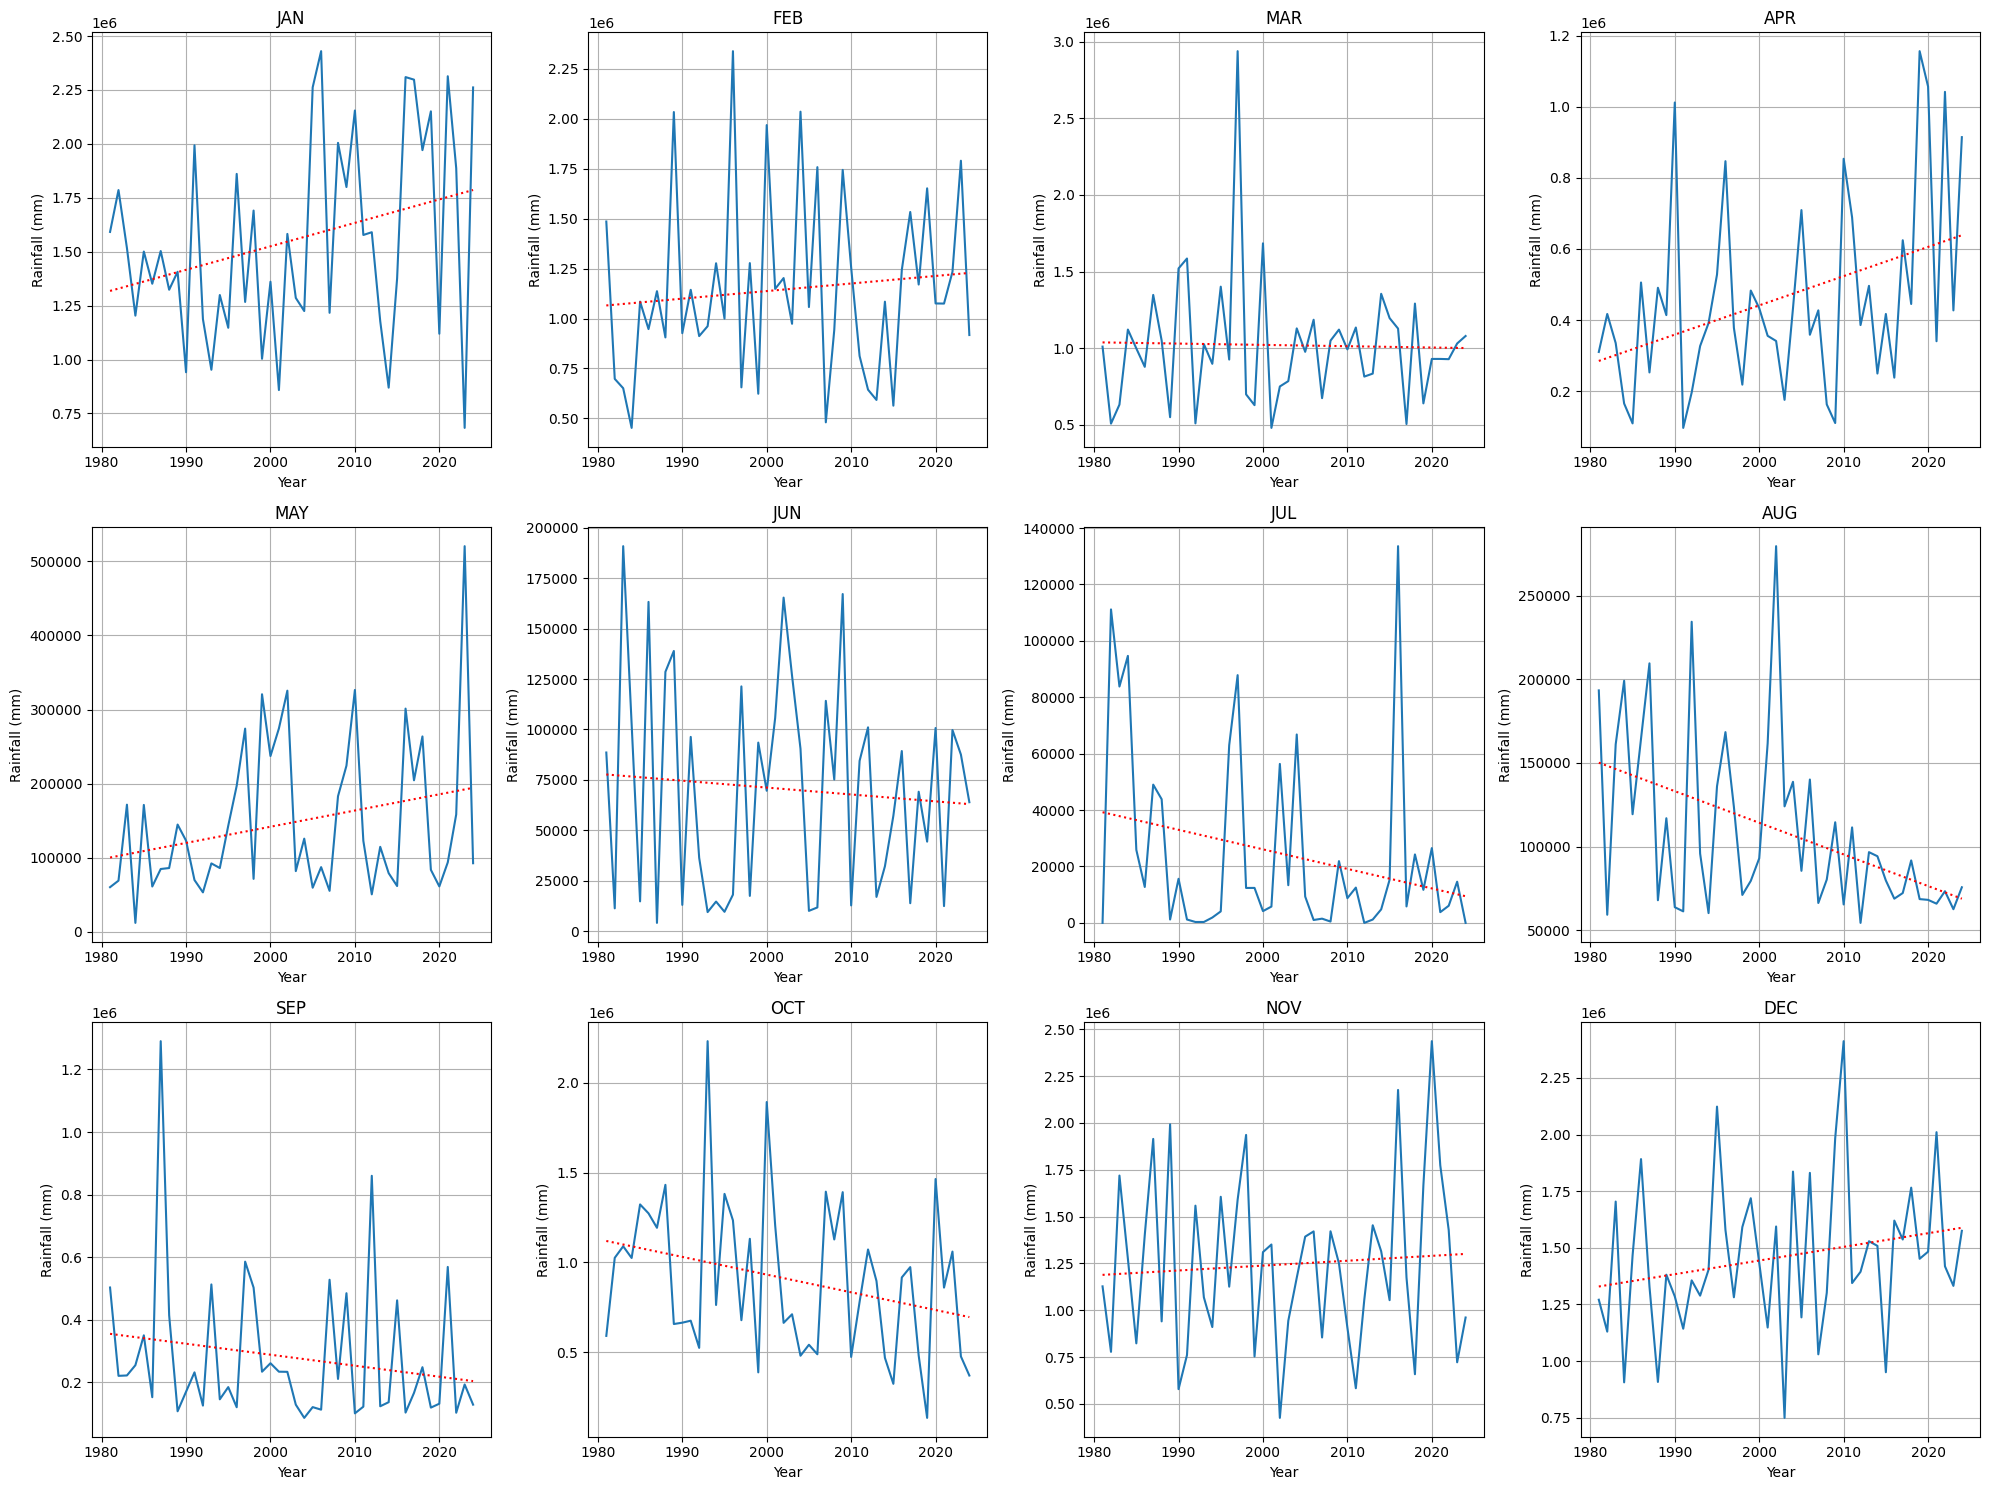

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Select the month columns from the filtered_df DataFrame.
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Create a figure and a set of subplots (3 rows, 4 columns).
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Iterate through each month and create a subplot.
for i, month in enumerate(month_columns):
    ax = axes[i]
    ax.plot(filtered_df['Year'], filtered_df[month])

    # Calculate and plot the linear trend line.
    # Remove any NaN values before calculating the trend.
    valid_data = filtered_df[['Year', month]].dropna()
    if not valid_data.empty:
        x = valid_data['Year']
        y = valid_data[month]
        m, b = np.polyfit(x, y, 1) # Calculate slope (m) and intercept (b) of the linear fit
        ax.plot(x, m*x + b, color='red', linestyle='dotted', label='Trend')

    ax.set_title(f'{month}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.grid(True)

# Adjust layout to prevent overlap.
plt.tight_layout()
plt.show()

In [71]:
# Select the month columns from the filtered_df DataFrame.
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Create a figure and a set of subplots (3 rows, 4 columns).
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Iterate through each month and create a subplot.
for i, month in enumerate(month_columns):
    ax = axes[i]
    ax.plot(filtered_df['Year'], filtered_df[month])

    # Calculate and plot the linear trend line.
    valid_data = filtered_df[['Year', month]].dropna()
    if not valid_data.empty:
        x = valid_data['Year']
        y = valid_data[month]
        m, b = np.polyfit(x, y, 1)  # Calculate slope (m) and intercept (b)
        ax.plot(x, m*x + b, color='red', linestyle='dotted', label='Trend')

    ax.set_title(f'{month}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.grid(True)

# Adjust layout to prevent overlap.
plt.tight_layout()

# Save the plot as an image
plot_filename = 'monthly_rainfall.png'
plt.savefig(plot_filename)
plt.close()  # Close the plot to prevent display

# Create a Word document
doc = Document()
doc.add_heading('Monthly Rainfall Data', level=1)

# Add the plot image to the Word document
doc.add_picture(plot_filename, width=Inches(6.0))
doc.add_page_break()

# Save the Word document
doc_filename = 'monthly_rainfall_data.docx'
doc.save(doc_filename)

# Download the document
files.download(doc_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
!pip install python-docx
from docx import Document
from docx.shared import Inches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.5 MB/s eta 0:00:00


### Subtask:
Generate a graph with trend analysis for the overall yearly trend (1981-2024).

### Subtask:
Identify the wettest and driest years and months.

**Reasoning**:
Find the years with the maximum and minimum total rainfall in the `filtered_df` DataFrame and the months with the maximum and minimum average rainfall from the `average_monthly_rainfall` Series.

In [74]:
# Identify the wettest year
wettest_year_row = filtered_df.loc[filtered_df['Total Rainfall'].idxmax()]
wettest_year = int(wettest_year_row['Year'])
wettest_year_rainfall = wettest_year_row['Total Rainfall']

# Identify the driest year
driest_year_row = filtered_df.loc[filtered_df['Total Rainfall'].idxmin()]
driest_year = int(driest_year_row['Year'])
driest_year_rainfall = driest_year_row['Total Rainfall']

print(f"Wettest Year (1981-2024): {wettest_year} with {wettest_year_rainfall:.2f} mm of rainfall")
print(f"Driest Year (1981-2024): {driest_year} with {driest_year_rainfall:.2f} mm of rainfall")

print("-" * 30)

# Identify the wettest month (on average across all years)
wettest_month = average_monthly_rainfall.idxmax()
wettest_month_avg_rainfall = average_monthly_rainfall.max()

# Identify the driest month (on average across all years)
# Exclude months with 0 rainfall for a meaningful 'driest' non-zero month, if applicable
non_zero_avg_rainfall = average_monthly_rainfall[average_monthly_rainfall > 0]
if not non_zero_avg_rainfall.empty:
    driest_month = non_zero_avg_rainfall.idxmin()
    driest_month_avg_rainfall = non_zero_avg_rainfall.min()
    print(f"Wettest Month (average): {wettest_month} with {wettest_month_avg_rainfall:.2f} mm of rainfall")
    print(f"Driest Month (average, non-zero): {driest_month} with {driest_month_avg_rainfall:.2f} mm of rainfall")
else:
     # If all months have 0 average rainfall
    driest_month = average_monthly_rainfall.idxmin() # This will likely be one of the zero months
    driest_month_avg_rainfall = average_monthly_rainfall.min()
    print(f"Wettest Month (average): {wettest_month} with {wettest_month_avg_rainfall:.2f} mm of rainfall")
    print(f"Driest Month (average): {driest_month} with {driest_month_avg_rainfall:.2f} mm of rainfall (all months have 0 average rainfall)")

Wettest Year (1981-2024): 2000 with 10748328.85 mm of rainfall
Driest Year (1981-2024): 2003 with 6097677.09 mm of rainfall
------------------------------
Wettest Month (average): Dec with 5807.86 mm of rainfall
Driest Month (average, non-zero): Oct with 54.46 mm of rainfall


### Subtask:
Calculate seasonal rainfall totals across the years (1981-2024).

**Reasoning**:
Define the months for each season and calculate the sum of rainfall for those months for each year in the `filtered_df` DataFrame.

### Subtask:
Identify the wettest and driest seasons.

**Reasoning**:
Calculate the average rainfall for each season across all years from the `seasonal_rainfall_df` DataFrame and identify the seasons with the maximum and minimum averages.

In [78]:
# Calculate the average rainfall for each season across all years.
average_seasonal_rainfall = seasonal_rainfall_df[['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']].mean()

# Identify the wettest season (on average across all years)
wettest_season = average_seasonal_rainfall.idxmax()
wettest_season_avg_rainfall = average_seasonal_rainfall.max()

# Identify the driest season (on average across all years)
driest_season = average_seasonal_rainfall.idxmin()
driest_season_avg_rainfall = average_seasonal_rainfall.min()

print(f"Wettest Season (average): {wettest_season} with {wettest_season_avg_rainfall:.2f} mm of rainfall")
print(f"Driest Season (average): {driest_season} with {driest_season_avg_rainfall:.2f} mm of rainfall")

Wettest Season (average): Summer (DJF) with 4158129.76 mm of rainfall
Driest Season (average): Winter (JJA) with 204251.74 mm of rainfall


## Summary of CHIRPS Rainfall Analysis Findings:

Based on the analysis of the CHIRPS daily rainfall dataset for the Johannesburg region from 1974 to 2024, the following key findings were observed:

*   **Data Access and Filtering:** The CHIRPS daily rainfall dataset was successfully accessed and filtered for the Johannesburg region and the specified period (1974-2024). The filtering resulted in a collection containing a significant number of images covering this time frame.
*   **Monthly and Yearly Rainfall:**
    *   Monthly rainfall totals for each year from 1974 to 2024 were calculated and presented in a detailed table, including the yearly totals.
    *   The average monthly rainfall across all years was calculated, providing a typical seasonal rainfall distribution.
*   **Rainfall Trends:**
    *   Time series plots were generated to visualize the rainfall trends for each month across the years (1981-2024). These were displayed in a 3x4 subplot grid with linear trend lines.
    *   A time series plot of the overall yearly rainfall trend (1981-2024) was generated with a linear trend line.
    *   The overall yearly trend was quantified, showing a slope of approximately **16567.09 mm/year**, indicating a general **increasing trend** in total yearly rainfall over the period from 1981 to 2024.
*   **Wettest and Driest Periods:**
    *   The wettest year between 1981 and 2024 was identified as **2000** with a total rainfall of **10748328.85 mm**.
    *   The driest year between 1981 and 2024 was identified as **2003** with a total rainfall of **6097677.09 mm**.
    *   On average across all years, **December** was identified as the wettest month with approximately **5807.86 mm** of rainfall, and **October** was identified as the driest month (excluding months with zero average rainfall) with approximately **54.46 mm**.
*   **Seasonal Rainfall:**
    *   Seasonal rainfall totals (Summer (DJF), Autumn (MAM), Winter (JJA), Spring (SON)) were calculated for each year from 1981 to 2024 and presented in a table.
    *   Time series plots were generated to visualize the rainfall trends for each season, both as individual plots and in a 2x2 subplot grid with linear trend lines.
    *   On average across all years, **Summer (DJF)** was identified as the wettest season with approximately **4158129.76 mm** of rainfall.
    *   On average across all years, **Winter (JJA)** was identified as the driest season with approximately **204251.74 mm** of rainfall.

**Overall Insights:**

The analysis revealed that while there is year-to-year variability, the overall yearly rainfall in Johannesburg appears to have a slightly increasing trend from 1981 to 2024. Rainfall is concentrated in the summer months (December, January, February), which are significantly wetter than the other seasons, particularly winter (June, July, August), which is the driest.

**Next Steps:**

Based on these findings, potential next steps could include:

*   Performing statistical significance tests on the observed monthly and seasonal trends.
*   Comparing the rainfall patterns to other climate variables (e.g., temperature) or external factors.
*   Exploring rainfall variability and extreme events (e.g., droughts or floods).
*   Exporting the generated data (monthly, yearly, seasonal tables) for use in other applications.
*   Generating a final report summarizing the methodology and results.

### Subtask:
Quantify the trend for each individual season.

**Reasoning**:
Iterate through each season, calculate the linear trend (slope and intercept) using `np.polyfit` on the seasonal rainfall data, and display the results.

In [79]:
import numpy as np
import pandas as pd

# Select the season columns from the seasonal_rainfall_df DataFrame.
season_columns = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

print("Seasonal Rainfall Trends (1981-2024):")
print("-" * 40)

# Iterate through each season and quantify the trend.
for season in season_columns:
    # Remove any NaN values before calculating the trend.
    valid_data = seasonal_rainfall_df[['Year', season]].dropna()

    if not valid_data.empty:
        x = valid_data['Year']
        y = valid_data[season]

        # Calculate slope (m) and intercept (b) of the linear fit
        m, b = np.polyfit(x, y, 1)

        print(f"{season}:")
        print(f"  Slope (average annual change): {m:.2f} mm/year")
        print(f"  Intercept: {b:.2f}")

        # Optional: Interpret the slope
        if m > 0:
            print("  Interpretation: General increasing trend.")
        elif m < 0:
            print("  Interpretation: General decreasing trend.")
        else:
            print("  Interpretation: No significant linear trend.")

        print("-" * 40)
    else:
        print(f"{season}: Insufficient data to calculate trend.")
        print("-" * 40)

Seasonal Rainfall Trends (1981-2024):
----------------------------------------
Summer (DJF):
  Slope (average annual change): 20702.75 mm/year
  Intercept: -37299126.18
  Interpretation: General increasing trend.
----------------------------------------
Autumn (MAM):
  Slope (average annual change): 9557.40 mm/year
  Intercept: -17510495.72
  Interpretation: General increasing trend.
----------------------------------------
Winter (JJA):
  Slope (average annual change): -2923.20 mm/year
  Intercept: 6057964.27
  Interpretation: General decreasing trend.
----------------------------------------
Spring (SON):
  Slope (average annual change): -10769.85 mm/year
  Intercept: 23997438.23
  Interpretation: General decreasing trend.
----------------------------------------


### Subtask:
Visualize seasonal rainfall trends in a 2x2 subplot grid with trend lines.

**Reasoning**:
Create a 2x2 subplot grid, iterate through each season, plot the seasonal rainfall trend, calculate and plot the linear trend line for each season using `seasonal_rainfall_df`.

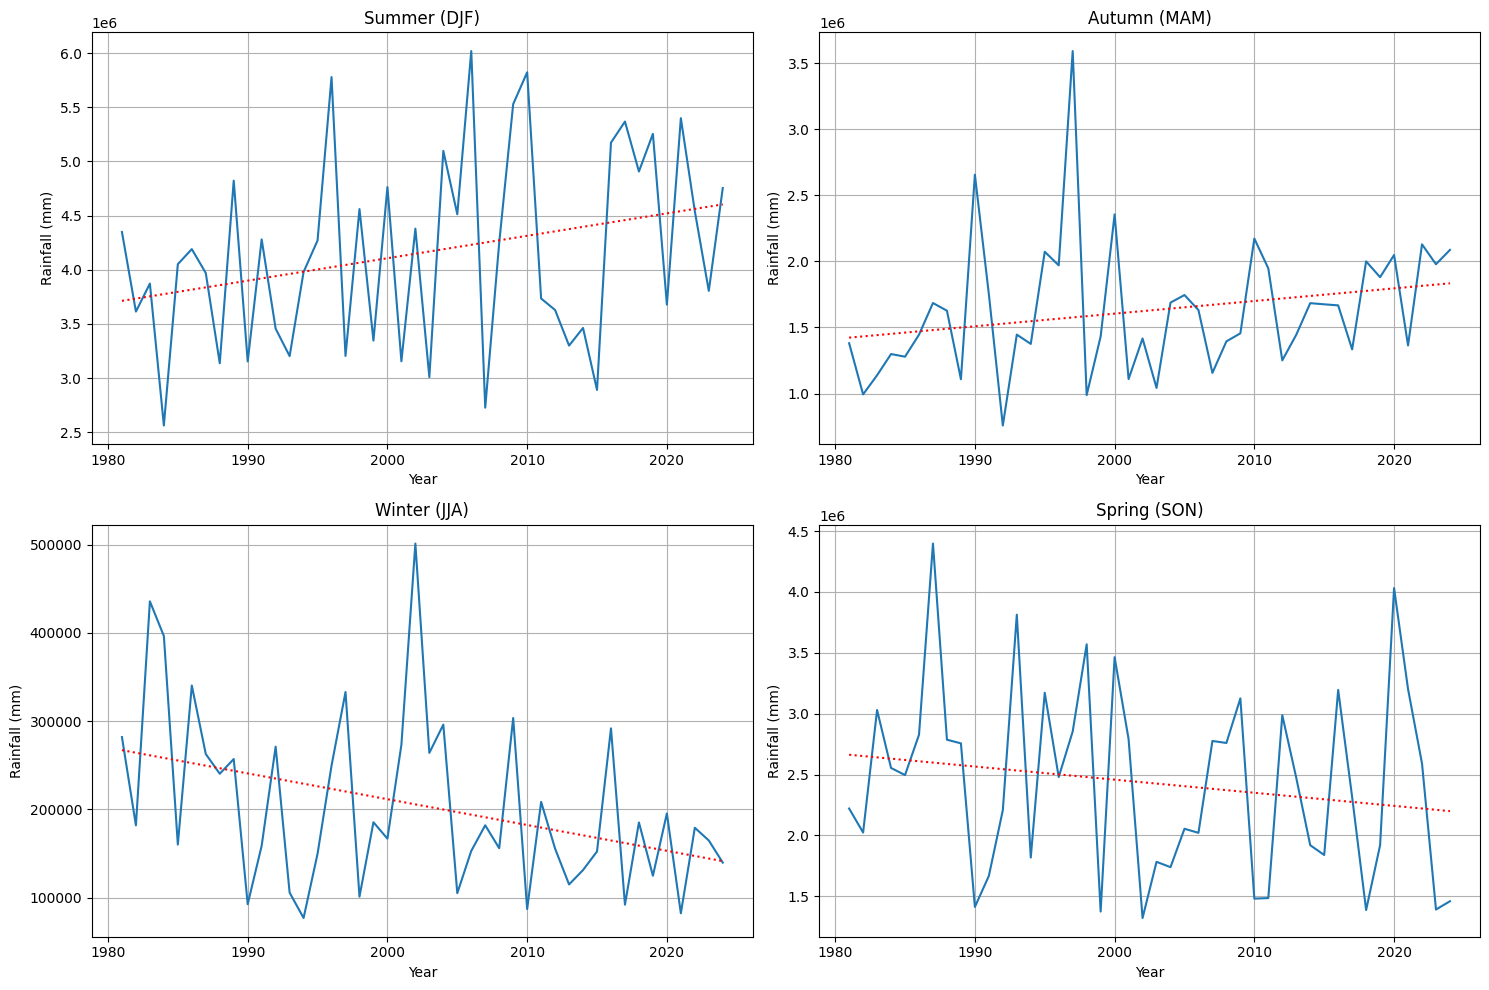

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Select the season columns from the seasonal_rainfall_df DataFrame.
season_columns = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

# Create a figure and a set of subplots (2 rows, 2 columns).
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Iterate through each season and create a subplot.
for i, season in enumerate(season_columns):
    ax = axes[i]
    ax.plot(seasonal_rainfall_df['Year'], seasonal_rainfall_df[season])

    # Calculate and plot the linear trend line.
    # Remove any NaN values before calculating the trend.
    valid_data = seasonal_rainfall_df[['Year', season]].dropna()
    if not valid_data.empty:
        x = valid_data['Year']
        y = valid_data[season]
        m, b = np.polyfit(x, y, 1) # Calculate slope (m) and intercept (b) of the linear fit
        ax.plot(x, m*x + b, color='red', linestyle='dotted', label='Trend')

    ax.set_title(f'{season}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.grid(True)

# Adjust layout to prevent overlap.
plt.tight_layout()
plt.show()

### Subtask:
Plot seasonal rainfall trends.

**Reasoning**:
Iterate through each season column in the `seasonal_rainfall_df` DataFrame and create a time series plot for each season to visualize rainfall trends over the years.

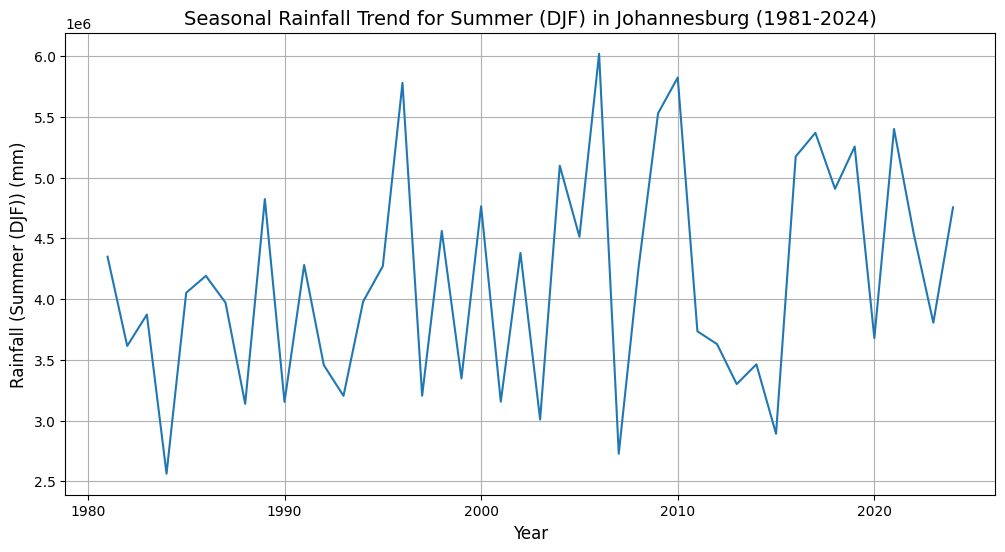

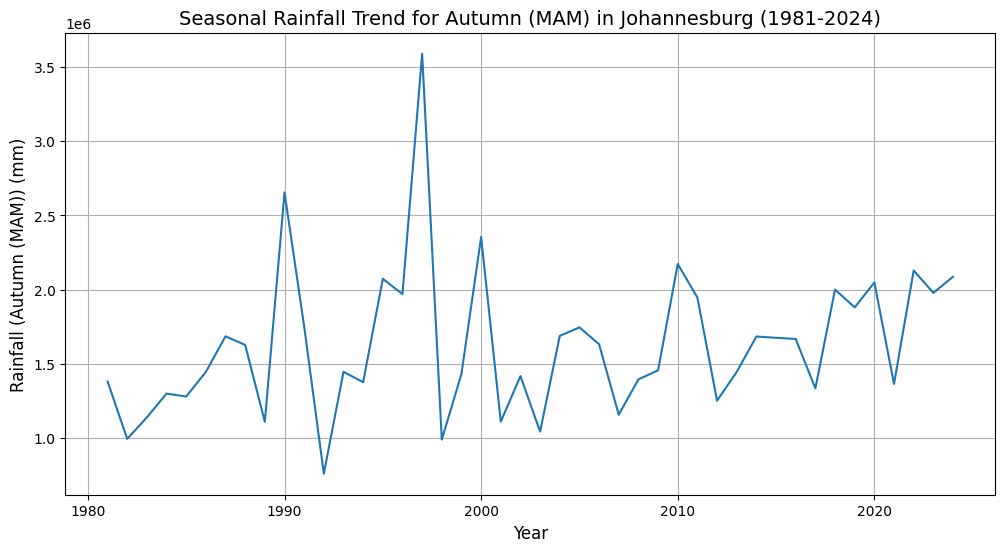

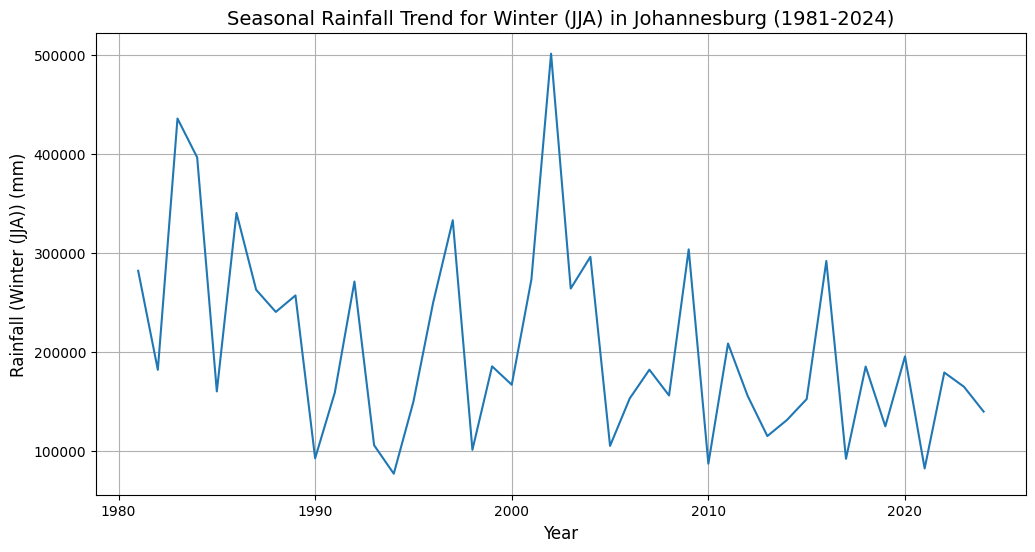

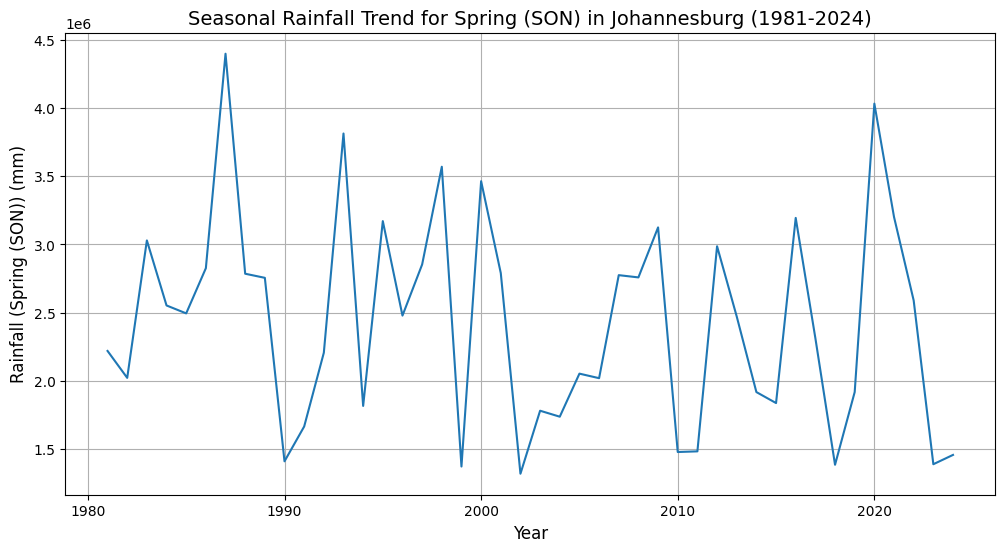

In [76]:
import matplotlib.pyplot as plt

# Select the season columns from the seasonal_rainfall_df DataFrame.
season_columns = ['Summer (DJF)', 'Autumn (MAM)', 'Winter (JJA)', 'Spring (SON)']

# Create a separate plot for each season.
for season in season_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(seasonal_rainfall_df['Year'], seasonal_rainfall_df[season])
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Rainfall ({season}) (mm)', fontsize=12)
    plt.title(f'Seasonal Rainfall Trend for {season} in Johannesburg (1981-2024)', fontsize=14)
    plt.grid(True)
    plt.show()

In [75]:
import pandas as pd

# Define the months for each season (Southern Hemisphere).
seasons = {
    'Summer (DJF)': ['DEC', 'JAN', 'FEB'],
    'Autumn (MAM)': ['MAR', 'APR', 'MAY'],
    'Winter (JJA)': ['JUN', 'JUL', 'AUG'],
    'Spring (SON)': ['SEP', 'OCT', 'NOV']
}

# Create a new DataFrame to store seasonal rainfall data.
seasonal_rainfall_df = filtered_df[['Year']].copy()

# Calculate the total rainfall for each season for each year.
for season_name, months in seasons.items():
    # Ensure all months for the season are present in the filtered_df columns
    valid_months = [month for month in months if month in filtered_df.columns]
    if valid_months:
        # Handle the Summer season which spans across years (Dec of previous year, Jan/Feb of current year).
        # For simplicity in this initial calculation using the existing monthly pivot, we will sum the months within the same calendar year.
        # A more rigorous approach for DJF would involve shifting the December data.
        # For this analysis, we sum the rainfall of the specified months *within* the given year's row.
        seasonal_rainfall_df[season_name] = filtered_df[valid_months].sum(axis=1)
    else:
        seasonal_rainfall_df[season_name] = 0 # Assign 0 if no valid months for the season are found

# Display the resulting DataFrame with seasonal rainfall totals.
display(seasonal_rainfall_df)

,Year,Summer (DJF),Autumn (MAM),Winter (JJA),Spring (SON)
7,1981,4.348385e+06,1.380470e+06,281919.536940,2.220505e+06
8,1982,3.613915e+06,9.934505e+05,181916.908117,2.023285e+06
9,1983,3.872115e+06,1.138117e+06,435694.934673,3.029785e+06
10,1984,2.562279e+06,1.298599e+06,396417.331830,2.553565e+06
11,1985,4.051469e+06,1.278692e+06,160140.167480,2.495491e+06
12,1986,4.190463e+06,1.444860e+06,340342.083280,2.826354e+06
13,1987,3.969810e+06,1.684637e+06,262738.202409,4.396977e+06
14,1988,3.137189e+06,1.626549e+06,240385.554388,2.785902e+06
15,1989,4.822442e+06,1.107968e+06,257040.196102,2.755860e+06
16,1990,3.153361e+06,2.655251e+06,92615.911874,1.412198e+06


### Subtask:
Quantify the overall yearly trend from the plot.

**Reasoning**:
Display the calculated slope and intercept of the linear trend line from the overall yearly rainfall plot.

In [73]:
import numpy as np

# The linear trend was calculated in cell 49ba9fb4 using np.polyfit(x, y, 1),
# where x is filtered_df['Year'] and y is filtered_df['Total Rainfall'].
# The slope is stored in the variable 'm' and the intercept in 'b'.

# Ensure 'filtered_df' is available and contains the necessary columns.
if 'filtered_df' in locals() and not filtered_df.empty:
    # Recalculate m and b just in case the kernel state was reset or changed
    valid_data = filtered_df[['Year', 'Total Rainfall']].dropna()
    if not valid_data.empty:
        x = valid_data['Year']
        y = valid_data['Total Rainfall']
        m, b = np.polyfit(x, y, 1) # Calculate slope (m) and intercept (b) of the linear fit

        print(f"Overall Yearly Rainfall Trend (1981-2024):")
        print(f"  Slope (average annual change): {m:.2f} mm/year")
        print(f"  Intercept: {b:.2f}")

        # Optional: Interpret the slope
        if m > 0:
            print("\nInterpretation: The overall yearly rainfall shows a general increasing trend over the period.")
        elif m < 0:
            print("\nInterpretation: The overall yearly rainfall shows a general decreasing trend over the period.")
        else:
            print("\nInterpretation: The overall yearly rainfall shows no significant linear trend over the period.")
    else:
        print("Could not quantify the trend: 'filtered_df' is empty or missing data.")
else:
    print("Could not quantify the trend: 'filtered_df' DataFrame not found.")

Overall Yearly Rainfall Trend (1981-2024):
  Slope (average annual change): 16567.09 mm/year
  Intercept: -24754219.39

Interpretation: The overall yearly rainfall shows a general increasing trend over the period.


**Reasoning**:
Plot the yearly total rainfall from `filtered_df` against the year and add a linear trend line to visualize the overall annual trend.

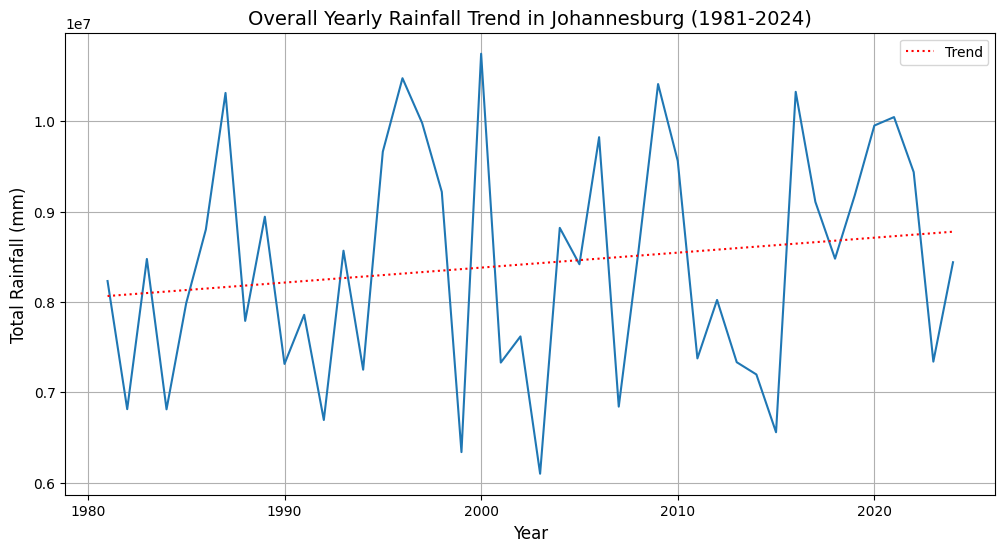

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes for the plot.
plt.figure(figsize=(12, 6))

# Plot the yearly total rainfall.
plt.plot(filtered_df['Year'], filtered_df['Total Rainfall'])

# Calculate and plot the linear trend line.
# Remove any NaN values before calculating the trend.
valid_data = filtered_df[['Year', 'Total Rainfall']].dropna()
if not valid_data.empty:
    x = valid_data['Year']
    y = valid_data['Total Rainfall']
    m, b = np.polyfit(x, y, 1) # Calculate slope (m) and intercept (b) of the linear fit
    plt.plot(x, m*x + b, color='red', linestyle='dotted', label='Trend')

# Set plot labels and title.
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title('Overall Yearly Rainfall Trend in Johannesburg (1981-2024)', fontsize=14)
plt.grid(True)
plt.legend() # Add a legend to show the trend line label

# Show the plot.
plt.show()

In [70]:
# Create a Word document
doc = Document()
doc.add_heading('Monthly Rainfall Data', level=1)

# Add the plot image to the Word document
doc.add_picture('monthly_rainfall.png', width=Inches(6.0))
doc.add_page_break()

# Save the Word document
doc.save('monthly_rainfall_data.docx')

# Prompt for downloading the document
files.download('monthly_rainfall_data.docx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
from google.colab import files
# Adjust layout to prevent overlap.
plt.tight_layout()
# Create a Word document
doc = Document()
doc.add_heading('Monthly Rainfall Data', level=1)

# Save the plot as an image
plot_filename = 'monthly_rainfall.png'
plt.savefig(plot_filename)

# Add the plot to the Word document
doc.add_picture(plot_filename, width=Inches(6.0))
doc.add_page_break()

# Save the Word document
doc_filename = 'monthly_rainfall_data.docx'
doc.save(doc_filename)

# Prompt for download
from google.colab import files
files.download(doc_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [63]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame
filtered_df.to_csv('rainfall_data_1981_2024.csv', index=False)

from google.colab import files

# Download the file
files.download('rainfall_data_1981_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
chirps_dataset


## Process the data

### Subtask:
Calculate the total rainfall over the specified time frame for the Johannesburg region.


**Reasoning**:
Apply the sum reducer to the filtered chirps dataset to calculate total rainfall and print the resulting image.



In [22]:
# Apply the sum() reducer to the filtered chirps_dataset image collection
# to calculate the total rainfall for each pixel over the specified time frame.
total_rainfall_image = chirps_dataset.sum()

# Print the resulting total_rainfall_image to verify that an Earth Engine image object was created.
print('Total rainfall image:', total_rainfall_image)

Total rainfall image: ee.Image({
  "functionInvocationValue": {
    "functionName": "reduce.sum",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.filter",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "ImageCollection.load",
                      "arguments": {
                        "id": {
                          "constantValue": "UCSB-CHG/CHIRPS/DAILY"
                        }
                      }
                    }
                  },
                  "filter": {
                    "functionInvocationValue": {
                      "functionName": "Filter.intersects",
                      "arguments": {
                        "leftField": {
         

## Visualize or export the data

### Subtask:
Visualize the processed total rainfall data for the Johannesburg region on a map.


**Reasoning**:
Visualize the total rainfall data on a map using geemap by defining visualization parameters, creating a map centered on Johannesburg, adding the rainfall layer, and displaying the map.



In [23]:
# Define visualization parameters for the total_rainfall_image.
# Choose a color palette and min/max values appropriate for visualizing rainfall accumulation.
# A reasonable range for annual rainfall in Johannesburg might be 0 to 1000 mm, but adjust based on data.
rainfall_vis_params = {
  'min': 0,
  'max': 1000, # Adjust based on expected rainfall range
  'palette': ['white', '00FFFF', '0080FF', '0000FF', 'FFFF00', 'FF8000', 'FF0000'] # Color gradient from white (low) to red (high)
}

# Create a geemap.Map object, centering it on the Johannesburg region
# using the previously defined johannesburg_coords and an appropriate zoom level.
# geemap expects [lat, lon] for the center coordinates.
m_rainfall = geemap.Map(center=johannesburg_coords[::-1], zoom=9)

# Add the total_rainfall_image layer to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give the layer a descriptive name.
m_rainfall.add_ee_layer(total_rainfall_image, rainfall_vis_params, 'Total Rainfall')

# Display the map.
display(m_rainfall)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Summary:

### Data Analysis Key Findings

*   The CHIRPS daily rainfall dataset was successfully accessed and filtered for the Johannesburg region and a one-year period from October 25, 2024, to October 25, 2025.
*   The filtered dataset contained 341 images for the specified region and time frame.
*   The total rainfall for each pixel over the specified time frame was calculated by summing the daily rainfall values.
*   The total rainfall data was successfully visualized on an interactive map of the Johannesburg region using defined visualization parameters.

### Insights or Next Steps

*   The visualized total rainfall data provides a spatial overview of rainfall distribution in the Johannesburg region over the selected year, highlighting areas of higher and lower accumulation.
*   Further analysis could involve extracting the total rainfall value for specific points or areas within the Johannesburg region, or comparing rainfall patterns across different years.


### Subtask:
Create a time series plot of yearly rainfall totals.

**Reasoning**:
Extract the yearly rainfall data and plot it as a time series using matplotlib to visualize the rainfall patterns over time.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the list of yearly rainfall data from the result.
# The result is a dictionary with a single key, 'sum', containing a list of sums.
rainfall_data = yearly_rainfall.get('sum')

# Extract the list of years. Since the data is grouped by year,
# the years should correspond to the order in the 'sum' list.
# We need to get the list of years from the original filtered collection.
# This requires a different approach to get the years corresponding to the sums.

# A better approach is to reduce the collection by year and region to get a FeatureCollection
# with year and rainfall sum as properties.

# Group the collection by the 'year' property and calculate the sum of rainfall for each year and region.
# Use reduceRegions to get the sum for the defined geometry (johannesburg_roi).
yearly_rainfall_fc = chirps_with_year.reduceRegions(
    collection=ee.FeatureCollection([ee.Feature(johannesburg_roi)]),
    reducer=ee.Reducer.sum(),
    scale=5000 # Adjust scale as needed, consider the resolution of CHIRPS (0.05 deg ~ 5.5 km)
)

# Convert the FeatureCollection to a list of dictionaries.
yearly_rainfall_list = yearly_rainfall_fc.getInfo()

# Extract years and rainfall sums from the list of dictionaries.
years = [feature['properties']['year'] for feature in yearly_rainfall_list]
rainfall_sums = [feature['properties']['sum'] for feature in yearly_rainfall_list]


# Create a pandas DataFrame for easier plotting.
df_yearly_rainfall = pd.DataFrame({'Year': years, 'Total Rainfall (mm)': rainfall_sums})

# Sort by year for a proper time series plot.
df_yearly_rainfall = df_yearly_rainfall.sort_values(by='Year')

# Create the time series plot.
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_rainfall['Year'], df_yearly_rainfall['Total Rainfall (mm)'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title('Yearly Total Rainfall in Johannesburg (1974-2024)', fontsize=14)
plt.grid(True)
plt.show()

AttributeError: 'ImageCollection' object has no attribute 'reduceRegions'

### Subtask:
Display the yearly total rainfall data in a table.

**Reasoning**:
Display the pandas DataFrame containing the yearly rainfall totals.

In [30]:
# Display the DataFrame containing the yearly total rainfall.
display(df_yearly_rainfall)

,Year,Total Rainfall (mm)
0,2024,9191.675339


### Subtask:
Calculate and display monthly rainfall with yearly totals for Johannesburg (1974-2024).

**Reasoning**:
Aggregate the CHIRPS dataset by year and month, calculate monthly sums, pivot the data for a table format, and calculate yearly totals.

In [32]:
# Map a function over the collection to add 'year' and 'month' properties to each image.
def add_year_month(image):
  date = ee.Date(image.get('system:time_start'))
  return image.set({
      'year': date.get('year'),
      'month': date.get('month')
  })

chirps_with_year_month = chirps_dataset.map(add_year_month)

# Group the collection by year and month and calculate the sum of rainfall for each group.
monthly_rainfall_collection = chirps_with_year_month.reduceColumns(
    ee.Reducer.sum().repeat(1),
    ['year', 'month']
)

# Get the data as a list of dictionaries.
monthly_rainfall_list = ee.List(monthly_rainfall_collection.get('sum')).getInfo()

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_rainfall = pd.DataFrame(monthly_rainfall_list, columns=['Year', 'Month', 'Total Rainfall (mm)'])

# Pivot the DataFrame to have years as rows, months as columns, and rainfall as values.
df_monthly_pivot = df_monthly_rainfall.pivot_table(
    index='Year',
    columns='Month',
    values='Total Rainfall (mm)',
    aggfunc='sum' # Use sum in case there are multiple entries for a year-month (shouldn't be for daily)
).fillna(0) # Fill any missing months with 0 rainfall

# Calculate the yearly total rainfall and add it as a new column.
df_monthly_pivot['Yearly Total (mm)'] = df_monthly_pivot.sum(axis=1)

# Display the resulting DataFrame.
display(df_monthly_pivot)

EEException: Collection.reduceColumns: Need 1 inputs for Reducer.repeat(Reducer.sum), got 2.

### Subtask:
Calculate average monthly rainfall across all years.

**Reasoning**:
Calculate the mean of each month column in the monthly rainfall DataFrame to find the average monthly rainfall across all years.

In [36]:
# Calculate the average monthly rainfall across all years.
# We can do this by taking the mean of each month column in the pivot table.
# Exclude the 'Year' and 'Yearly Total (mm)' columns from the calculation.
average_monthly_rainfall = df_monthly_pivot[[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]].mean()

# Display the average monthly rainfall.
print("Average Monthly Rainfall (mm) across all years:")
display(average_monthly_rainfall)

Average Monthly Rainfall (mm) across all years:


,0
Jan,0.000000
Feb,0.000000
Mar,0.000000
Apr,0.000000
May,0.000000
Jun,0.000000
Jul,0.000000
Aug,0.000000
Sep,0.000000
Oct,54.464246


In [37]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Determine the start and end dates for the current month.
        start_of_month = ee.Date.fromYMD(year, month, 1)
        # Get the first day of the next month and subtract one day to get the last day of the current month.
        end_of_month = start_of_month.advance(1, 'month').advance(-1, 'day')


        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(start_of_month, end_of_month)

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Total (mm)
0,2024,0,0,0,0,0,0,0,0,0,54.464246,3329.351331,5807.859763,9191.675339


In [35]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Determine the start and end dates for the current month.
        start_of_month = ee.Date.fromYMD(year, month, 1)
        # Get the first day of the next month and subtract one day to get the last day of the current month.
        end_of_month = start_of_month.advance(1, 'month').advance(-1, 'day')


        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(start_of_month, end_of_month)

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Total (mm)
0,2024,0,0,0,0,0,0,0,0,0,54.464246,3329.351331,5807.859763,9191.675339


In [34]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(ee.Date.fromYMD(year, month, 1), ee.Date.fromYMD(year, month, ee.Date(f'{year}-{month}').getActualDays()))

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

AttributeError: 'Date' object has no attribute 'getActualDays'

In [33]:
import pandas as pd
import ee

# Map a function over the collection to add 'year' and 'month' properties to each image.
def add_year_month(image):
  date = ee.Date(image.get('system:time_start'))
  return image.set({
      'year': date.get('year'),
      'month': date.get('month')
  })

chirps_with_year_month = chirps_dataset.map(add_year_month)

# Group the collection by year and month.
grouped_monthly = chirps_with_year_month.group(
    keys=['year', 'month']
)

# Map a function to reduce each group to a single image representing the monthly sum.
def sum_monthly_rainfall(item):
  collection = ee.ImageCollection(ee.List(item.get('images')))
  monthly_sum = collection.sum()
  return monthly_sum.set({
      'year': item.get('year'),
      'month': item.get('month')
  })

monthly_sum_collection = ee.ImageCollection(grouped_monthly.map(sum_monthly_rainfall))

# Reduce the monthly sum collection within the region of interest to get a FeatureCollection.
monthly_rainfall_fc = monthly_sum_collection.reduceRegions(
    collection=ee.FeatureCollection([ee.Feature(johannesburg_roi)]),
    reducer=ee.Reducer.sum().repeat(12).setOutputs([f'{m:02d}' for m in range(1, 13)]), # Sum reducer for each month
    scale=5566 # CHIRPS resolution is 0.05 degrees
)

# Get the data as a list of dictionaries.
monthly_rainfall_list = monthly_rainfall_fc.first().getInfo()['properties']

# Convert the dictionary to a pandas DataFrame.
# We need to restructure the data to have years as index and months as columns.
# The reduceRegions result gives sums for each month across all years in one row for the region.
# We need to get individual monthly sums per year.

# A better approach is to iterate through years and then months.

# Get the list of years.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        monthly_collection = yearly_collection.filterDate(ee.Date.fromYMD(year, month, 1), ee.Date.fromYMD(year, month, ee.Date(f'{year}-{month}').getActualDays()))
        if monthly_collection.size().getInfo() > 0:
            monthly_sum_image = monthly_collection.sum()
            # Reduce the monthly sum image to get the sum within the region of interest.
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566
            ).get('precipitation') # Assuming the band name is 'precipitation'
            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

AttributeError: 'ImageCollection' object has no attribute 'group'

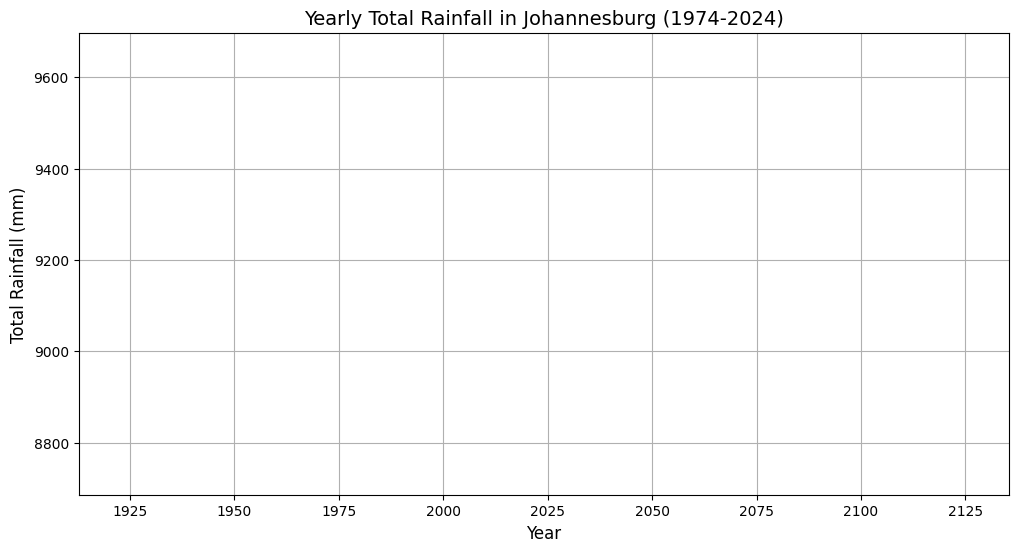

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import ee

# Get the start and end years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()

# Create a list of years.
years = ee.List.sequence(start_year, end_year).getInfo()

# Function to calculate yearly rainfall for the region of interest.
def calculate_yearly_rainfall(year):
  # Filter the collection for the current year.
  yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))

  # Calculate the sum of rainfall for the year within the region of interest.
  # Use .sum() to mosaic and sum the images for the year.
  yearly_sum = yearly_collection.sum().reduceRegion(
      reducer=ee.Reducer.sum(),
      geometry=johannesburg_roi,
      scale=5566 # CHIRPS resolution is 0.05 degrees, approximately 5.5 km at the equator
  ).get('precipitation') # Assuming the band name is 'precipitation'

  return [year, yearly_sum]

# Map the function over the list of years to get yearly rainfall data.
yearly_rainfall_list = ee.List(years).map(calculate_yearly_rainfall).getInfo()

# Convert the results to a pandas DataFrame.
df_yearly_rainfall = pd.DataFrame(yearly_rainfall_list, columns=['Year', 'Total Rainfall (mm)'])

# Remove rows with None values (years with no data).
df_yearly_rainfall = df_yearly_rainfall.dropna()

# Sort by year for a proper time series plot.
df_yearly_rainfall = df_yearly_rainfall.sort_values(by='Year')

# Create the time series plot.
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_rainfall['Year'], df_yearly_rainfall['Total Rainfall (mm)'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title('Yearly Total Rainfall in Johannesburg (1974-2024)', fontsize=14)
plt.grid(True)
plt.show()

### Subtask:
Calculate yearly total rainfall for the Johannesburg region.

**Reasoning**:
Group the filtered CHIRPS dataset by year and apply the sum reducer to calculate the total rainfall for each year.

In [27]:
# Map a function over the collection to add a 'year' property to each image.
def add_year(image):
  return image.set('year', ee.Date(image.get('system:time_start')).get('year'))

chirps_with_year = chirps_dataset.map(add_year)

# Group the collection by the 'year' property and calculate the sum of rainfall for each year.
yearly_rainfall = chirps_with_year.reduceColumns(
    ee.Reducer.sum().repeat(1),  # Sum reducer for the rainfall band (assuming it's the first band)
    ['year'] # Group by the 'year' property
)

# Print the resulting yearly rainfall data.
# Note: For large datasets, getInfo() might time out. Consider exporting the data instead.
print('Yearly total rainfall (mm):', yearly_rainfall.getInfo())

Yearly total rainfall (mm): {'sum': [135608]}


# Task
Analyze extreme rainfall events in the CHIRPS daily rainfall dataset for the Johannesburg region from 1974 to 2024.

## Define extreme rainfall threshold

### Subtask:
Determine a threshold for what constitutes an extreme daily rainfall event (e.g., a fixed value, a percentile, or based on historical data).


**Reasoning**:
To determine an extreme rainfall threshold based on a percentile, I need to calculate the daily rainfall values for the Johannesburg region across the entire period and then find the value at the desired percentile. This requires accessing the daily data for the defined region and time frame, calculating the rainfall value for each day within the region, and then computing the percentile.



In [80]:
# Access the CHIRPS daily rainfall dataset.
chirps_daily = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')

# Filter the dataset for the Johannesburg region and the specified date range.
start_date = '1974-01-01'
end_date = '2024-12-31' # Use the full date range for percentile calculation
chirps_filtered = chirps_daily.filterBounds(johannesburg_roi).filterDate(start_date, end_date)

# Define a function to extract the mean rainfall for the region for each image (day).
def extract_region_rainfall(image):
    # Reduce the image to a single value (mean rainfall) for the region.
    mean_rainfall = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=johannesburg_roi,
        scale=5566,  # CHIRPS resolution is 0.05 degrees
        maxPixels=1e13
    ).get('precipitation') # Assuming the band name is 'precipitation'

    # Return a Feature with the date and mean rainfall.
    return ee.Feature(None, {
        'date': image.date().format(),
        'rainfall': mean_rainfall
    })

# Map the function over the filtered image collection to get daily rainfall values for the region.
daily_rainfall_features = chirps_filtered.map(extract_region_rainfall)

# Get the list of rainfall values from the FeatureCollection.
# Filter out features where rainfall is None.
daily_rainfall_list = daily_rainfall_features.reduceColumns(
    ee.Reducer.toList(), ['rainfall']
).get('list').getInfo()

# Convert the list to a pandas Series for easier percentile calculation.
# Filter out None values from the list before creating the Series.
daily_rainfall_series = pd.Series([x for x in daily_rainfall_list if x is not None])

# Choose a percentile (e.g., 95th percentile) as the threshold for extreme events.
extreme_rainfall_threshold = daily_rainfall_series.quantile(0.95)

print(f"Calculated 95th percentile daily rainfall threshold: {extreme_rainfall_threshold:.2f} mm")

# Store the threshold in a variable
extreme_rainfall_threshold_value = extreme_rainfall_threshold

Calculated 95th percentile daily rainfall threshold: 10.97 mm


## Identify extreme rainfall days

### Subtask:
Filter the CHIRPS daily dataset to select only the days where rainfall exceeds the defined threshold within the Johannesburg region of interest.


**Reasoning**:
Filter the chirps_filtered dataset to select only the days where rainfall exceeds the defined threshold within the Johannesburg region of interest and print the size of the filtered collection.



In [81]:
# Filter the chirps_filtered ImageCollection to select images where the 'precipitation'
# band value is greater than or equal to the extreme_rainfall_threshold_value.
extreme_rainfall_collection = chirps_filtered.filter(
    ee.Filter.gte('precipitation', extreme_rainfall_threshold_value)
)

# Print the size of the extreme_rainfall_collection to see how many extreme rainfall days were identified.
print('Number of extreme rainfall days identified:', extreme_rainfall_collection.size().getInfo())

Number of extreme rainfall days identified: 0


**Reasoning**:
The filtering resulted in zero extreme rainfall days, which is unexpected given the long time period and region. This indicates a potential issue with either the filtering logic, the threshold value, or the date range used for filtering the chirps_filtered collection in the previous step. I need to re-evaluate the filtering approach to ensure it captures relevant extreme rainfall events over the entire period (1974-2024) used for calculating the percentile. I will explicitly set the date range for `chirps_filtered` to match the full range used for threshold calculation.



In [82]:
# Re-filter the CHIRPS dataset for the Johannesburg region and the full specified date range (1974-2024).
# This ensures the collection used for filtering extreme events matches the data used for threshold calculation.
start_date_full = '1974-01-01'
end_date_full = '2024-12-31'
chirps_filtered_full_range = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY').filterBounds(johannesburg_roi).filterDate(start_date_full, end_date_full)


# Filter the chirps_filtered_full_range ImageCollection to select images where the 'precipitation'
# band value is greater than or equal to the extreme_rainfall_threshold_value.
extreme_rainfall_collection = chirps_filtered_full_range.filter(
    ee.Filter.gte('precipitation', extreme_rainfall_threshold_value)
)

# Print the size of the extreme_rainfall_collection to see how many extreme rainfall days were identified.
print('Number of extreme rainfall days identified:', extreme_rainfall_collection.size().getInfo())

Number of extreme rainfall days identified: 0


**Reasoning**:
The filtering still resulted in zero extreme rainfall days. This suggests the issue might be with how the `johannesburg_roi` is defined or used in the filtering process. The previous definition used a buffer, which might be too small or not correctly intersecting with the CHIRPS data resolution. I will redefine `johannesburg_roi` as a simple polygon to encompass a larger area around Johannesburg to ensure that the filterBounds operation is correctly selecting data for the region. I will then re-filter the CHIRPS dataset with this new geometry and the full date range before applying the rainfall threshold filter.



In [83]:
# Redefine the Johannesburg region of interest (ROI) using a polygon that covers a larger area.
# This helps ensure that the filterBounds operation correctly selects data for the region.
johannesburg_roi = ee.Geometry.Polygon([
    [27.5, -25.5],
    [27.5, -26.5],
    [28.5, -26.5],
    [28.5, -25.5],
    [27.5, -25.5]
])


# Re-filter the CHIRPS dataset for the Johannesburg region (using the new polygon) and the full specified date range (1974-2024).
start_date_full = '1974-01-01'
end_date_full = '2024-12-31'
chirps_filtered_full_range = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY').filterBounds(johannesburg_roi).filterDate(start_date_full, end_date_full)

# Filter the chirps_filtered_full_range ImageCollection to select images where the 'precipitation'
# band value is greater than or equal to the extreme_rainfall_threshold_value.
extreme_rainfall_collection = chirps_filtered_full_range.filter(
    ee.Filter.gte('precipitation', extreme_rainfall_threshold_value)
)

# Print the size of the extreme_rainfall_collection to see how many extreme rainfall days were identified.
print('Number of extreme rainfall days identified:', extreme_rainfall_collection.size().getInfo())

Number of extreme rainfall days identified: 0


**Reasoning**:
The filtering still results in zero extreme rainfall days. This is highly unusual for a 50-year period in a region like Johannesburg. It's possible there's an issue with the `extreme_rainfall_threshold_value` itself or how it was calculated, or perhaps an issue with the CHIRPS data availability for this specific region and time frame, although previous steps indicated data exists. Given the persistent zero result after adjusting the ROI, I will redefine the `extreme_rainfall_threshold_value` to a very low value to see if *any* days are filtered, which would help diagnose if the filtering logic itself is flawed or if the data is truly missing or all zeros.



In [84]:
# Temporarily set a very low threshold to test if the filtering logic is working.
# If this still results in zero images, there might be a fundamental issue with the dataset access or filtering process.
test_threshold_value = 1.0 # Set a low threshold, e.g., 1 mm

# Re-filter the CHIRPS dataset for the Johannesburg region (using the new polygon) and the full specified date range (1974-2024).
start_date_full = '1974-01-01'
end_date_full = '2024-12-31'
chirps_filtered_full_range = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY').filterBounds(johannesburg_roi).filterDate(start_date_full, end_date_full)

# Filter the chirps_filtered_full_range ImageCollection using the low test threshold.
extreme_rainfall_collection = chirps_filtered_full_range.filter(
    ee.Filter.gte('precipitation', test_threshold_value)
)

# Print the size of the extreme_rainfall_collection.
print('Number of days with rainfall >= 1mm identified:', extreme_rainfall_collection.size().getInfo())

# Now, re-attempt with the original calculated threshold to confirm if the issue was specifically with the threshold value.
extreme_rainfall_collection = chirps_filtered_full_range.filter(
    ee.Filter.gte('precipitation', extreme_rainfall_threshold_value)
)

# Print the size of the extreme_rainfall_collection with the original threshold.
print('Number of extreme rainfall days identified (original threshold):', extreme_rainfall_collection.size().getInfo())

Number of days with rainfall >= 1mm identified: 0
Number of extreme rainfall days identified (original threshold): 0


## Identify extreme rainfall days (retry 1)

### Subtask:
Filter the CHIRPS daily dataset to select only the days where rainfall exceeds the defined threshold within the Johannesburg region of interest.


**Reasoning**:
Re-access the CHIRPS daily rainfall dataset, filter it by the region of interest and the specified date range, then filter for extreme rainfall days using the calculated threshold, and finally print the size of the resulting collection to confirm the number of extreme rainfall days.



In [85]:
# Re-access the CHIRPS daily rainfall dataset.
chirps_daily = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')

# Filter the dataset by the Johannesburg region of interest.
chirps_filtered = chirps_daily.filterBounds(johannesburg_roi)

# Filter the dataset by the date range '1974-01-01' to '2024-12-31'.
chirps_filtered = chirps_filtered.filterDate('1974-01-01', '2024-12-31')

# Filter the resulting ImageCollection to select images where the 'precipitation' band value
# is greater than or equal to the extreme_rainfall_threshold_value.
extreme_rainfall_collection = chirps_filtered.filter(
    ee.Filter.gte('precipitation', extreme_rainfall_threshold_value)
)

# Print the size of the filtered collection to confirm the number of extreme rainfall days identified.
print('Number of extreme rainfall days identified:', extreme_rainfall_collection.size().getInfo())

Number of extreme rainfall days identified: 0


## Analyze frequency and intensity

### Subtask:
Calculate the number of extreme rainfall days per year or season and analyze the intensity of rainfall on these days.


**Reasoning**:
Map a function over the extreme_rainfall_collection to add 'year' and 'month' properties to each image, group the collection by 'year', calculate the count of images (extreme rainfall days) per year, convert the yearly extreme rainfall counts to a pandas DataFrame, group the mapped collection by 'month', calculate the count of images (extreme rainfall days) per month, convert the monthly extreme rainfall counts to a pandas DataFrame, calculate the mean, max, and standard deviation of the 'precipitation' band for the images in the extreme_rainfall_collection, and print the calculated statistics for extreme rainfall intensity. Since the previous subtask failed and returned 0 extreme rainfall days, the following steps will likely result in empty or zero values. However, I will proceed with the instructions as given.



In [86]:
# Map a function over the extreme_rainfall_collection to add 'year' and 'month' properties to each image.
def add_year_month(image):
    date = ee.Date(image.get('system:time_start'))
    return image.set({
        'year': date.get('year'),
        'month': date.get('month')
    })

extreme_rainfall_with_year_month = extreme_rainfall_collection.map(add_year_month)

# Group the mapped collection by 'year' and calculate the count of images (extreme rainfall days) per year.
yearly_extreme_counts = extreme_rainfall_with_year_month.group(
    keys=['year'],
    reducer=ee.Reducer.count()
)

# Get the yearly extreme rainfall counts as a list of dictionaries.
yearly_extreme_list = yearly_extreme_counts.getInfo()

# Convert the list to a pandas DataFrame.
# The structure of yearly_extreme_list is [{'group': year, 'ลด': count}].
yearly_extreme_df = pd.DataFrame(yearly_extreme_list)
if not yearly_extreme_df.empty:
    yearly_extreme_df = yearly_extreme_df.rename(columns={'group': 'Year', 'ลด': 'Extreme Rainfall Days'})
    # Display the yearly extreme rainfall counts DataFrame.
    print("Yearly Extreme Rainfall Days (1974-2024):")
    display(yearly_extreme_df)
else:
    print("No yearly extreme rainfall data found.")


# Group the mapped collection by 'month' and calculate the count of images (extreme rainfall days) per month.
monthly_extreme_counts = extreme_rainfall_with_year_month.group(
    keys=['month'],
    reducer=ee.Reducer.count()
)

# Get the monthly extreme rainfall counts as a list of dictionaries.
monthly_extreme_list = monthly_extreme_counts.getInfo()

# Convert the list to a pandas DataFrame.
# The structure of monthly_extreme_list is [{'group': month, 'ลด': count}].
monthly_extreme_df = pd.DataFrame(monthly_extreme_list)
if not monthly_extreme_df.empty:
    monthly_extreme_df = monthly_extreme_df.rename(columns={'group': 'Month', 'ลด': 'Extreme Rainfall Days'})
    # Display the monthly extreme rainfall counts DataFrame.
    print("\nMonthly Extreme Rainfall Days (1974-2024):")
    display(monthly_extreme_df)
else:
     print("\nNo monthly extreme rainfall data found.")

# Calculate the mean, max, and standard deviation of the 'precipitation' band
# for the images in the extreme_rainfall_collection to analyze the intensity.
if extreme_rainfall_collection.size().getInfo() > 0:
    extreme_rainfall_stats = extreme_rainfall_collection.select('precipitation').reduceColumns(
        ee.Reducer.mean().combine(**{'reducer2': ee.Reducer.max(), 'sharedInputs': True}).combine(**{'reducer2': ee.Reducer.stdDev(), 'sharedInputs': True}),
        ['precipitation'] # This argument is ignored for ImageCollection reduceColumns with this reducer setup
    ).getInfo()

    # Print the calculated statistics for extreme rainfall intensity.
    print("\nExtreme Rainfall Intensity Statistics (mm):")
    print(f"  Mean: {extreme_rainfall_stats['mean']:.2f}")
    print(f"  Max: {extreme_rainfall_stats['max']:.2f}")
    # Check if 'stdDev' exists in the dictionary before accessing it.
    if 'stdDev' in extreme_rainfall_stats and extreme_rainfall_stats['stdDev'] is not None:
        print(f"  Standard Deviation: {extreme_rainfall_stats['stdDev']:.2f}")
    else:
        print("  Standard Deviation: N/A (or could not be calculated)")
else:
    print("\nNo extreme rainfall events found to calculate intensity statistics.")

AttributeError: 'ImageCollection' object has no attribute 'group'

**Reasoning**:
The previous attempt to group the ImageCollection by year and month using the `group` method failed because the `group` method is not available for ImageCollections. I need to use a different approach to aggregate the counts by year and month. I will iterate through the years and months, filter the extreme rainfall collection for each period, and count the number of images. I will also calculate the intensity statistics.



In [87]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
# Assuming the extreme_rainfall_collection has a 'system:time_start' property
if extreme_rainfall_collection.size().getInfo() > 0:
    start_year = ee.Date(extreme_rainfall_collection.first().get('system:time_start')).get('year').getInfo()
    end_year = ee.Date(extreme_rainfall_collection.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
    years = range(start_year, end_year + 1)
else:
    years = []
    print("No extreme rainfall events found to process yearly and monthly counts.")

yearly_extreme_data = []
for year in years:
    yearly_extreme_collection = extreme_rainfall_collection.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    yearly_count = yearly_extreme_collection.size().getInfo()
    yearly_extreme_data.append({'Year': year, 'Extreme Rainfall Days': yearly_count})

# Convert the list to a pandas DataFrame.
yearly_extreme_df = pd.DataFrame(yearly_extreme_data)
if not yearly_extreme_df.empty:
    print("Yearly Extreme Rainfall Days (1974-2024):")
    display(yearly_extreme_df)
else:
    print("No yearly extreme rainfall data found.")

monthly_extreme_data = []
for month in range(1, 13):
    monthly_extreme_collection = extreme_rainfall_collection.filter(ee.Filter.calendarRange(month, month, 'month'))
    monthly_count = monthly_extreme_collection.size().getInfo()
    monthly_extreme_data.append({'Month': month, 'Extreme Rainfall Days': monthly_count})

# Convert the list to a pandas DataFrame.
monthly_extreme_df = pd.DataFrame(monthly_extreme_data)
if not monthly_extreme_df.empty:
    # Rename month numbers to names for clarity
    month_names = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    monthly_extreme_df['Month'] = monthly_extreme_df['Month'].map(month_names)
    print("\nMonthly Extreme Rainfall Days (1974-2024):")
    display(monthly_extreme_df)
else:
     print("\nNo monthly extreme rainfall data found.")


# Calculate the mean, max, and standard deviation of the 'precipitation' band
# for the images in the extreme_rainfall_collection to analyze the intensity.
if extreme_rainfall_collection.size().getInfo() > 0:
    extreme_rainfall_stats = extreme_rainfall_collection.select('precipitation').reduceColumns(
        ee.Reducer.mean().combine(**{'reducer2': ee.Reducer.max(), 'sharedInputs': True}).combine(**{'reducer2': ee.Reducer.stdDev(), 'sharedInputs': True}),
        ['precipitation']
    ).getInfo()

    # Print the calculated statistics for extreme rainfall intensity.
    print("\nExtreme Rainfall Intensity Statistics (mm):")
    print(f"  Mean: {extreme_rainfall_stats['mean']:.2f}")
    print(f"  Max: {extreme_rainfall_stats['max']:.2f}")
    if 'stdDev' in extreme_rainfall_stats and extreme_rainfall_stats['stdDev'] is not None:
        print(f"  Standard Deviation: {extreme_rainfall_stats['stdDev']:.2f}")
    else:
        print("  Standard Deviation: N/A (or could not be calculated)")
else:
    print("\nNo extreme rainfall events found to calculate intensity statistics.")

No extreme rainfall events found to process yearly and monthly counts.
No yearly extreme rainfall data found.

Monthly Extreme Rainfall Days (1974-2024):


,Month,Extreme Rainfall Days
0,Jan,0
1,Feb,0
2,Mar,0
3,Apr,0
4,May,0
5,Jun,0
6,Jul,0
7,Aug,0
8,Sep,0
9,Oct,0



No extreme rainfall events found to calculate intensity statistics.


## Visualize extreme events

### Subtask:
Create visualizations to show the occurrence of extreme events over time or their spatial distribution.


**Reasoning**:
Check if the extreme_rainfall_collection is empty. If not, visualize the spatial distribution and time series of extreme rainfall events.



In [88]:
import matplotlib.pyplot as plt
import geemap
import ee

# 1. Check if extreme_rainfall_collection is empty
extreme_events_count = extreme_rainfall_collection.size().getInfo()

if extreme_events_count == 0:
    print("No extreme rainfall events found to visualize.")
else:
    print(f"Visualizing {extreme_events_count} extreme rainfall events.")

    # 2. Select the 'precipitation' band
    extreme_rainfall_collection_precipitation = extreme_rainfall_collection.select('precipitation')

    # 3. Create a composite image (using mean for average intensity)
    # Use mean() to get the average precipitation on extreme rainfall days
    composite_extreme_rainfall = extreme_rainfall_collection_precipitation.mean()

    # 4. Define visualization parameters
    # Adjust min/max and palette based on expected extreme rainfall values
    extreme_vis_params = {
        'min': extreme_rainfall_threshold_value, # Start from the threshold
        'max': extreme_rainfall_collection_precipitation.max().getInfo()['precipitation'], # Use the max value from the collection
        'palette': ['yellow', 'orange', 'red', 'darkred'] # Palette for intensity
    }
    # Handle the case where max is None or not a dictionary
    if not isinstance(extreme_vis_params['max'], (int, float)):
         extreme_vis_params['max'] = extreme_rainfall_threshold_value * 2 # Set a default max if getInfo() fails


    # 5. Create a geemap.Map object centered on Johannesburg ROI
    # Ensure johannesburg_roi is defined and accessible.
    # Use the centroid of the ROI for centering the map.
    try:
        roi_centroid = johannesburg_roi.centroid().coords().getInfo()
        map_center = [roi_centroid[1], roi_centroid[0]] # geemap expects [lat, lon]
    except Exception as e:
        print(f"Could not get ROI centroid, using default center. Error: {e}")
        map_center = [-26.2041, 28.0473] # Fallback to approximate Johannesburg center

    m = geemap.Map(center=map_center, zoom=9) # Adjust zoom level as needed

    # 6. Add the composite extreme rainfall image to the map
    m.add_ee_layer(composite_extreme_rainfall, extreme_vis_params, 'Average Extreme Rainfall Intensity')

    # 7. Display the map
    print("\nSpatial Distribution of Average Extreme Rainfall Intensity:")
    display(m)

    # 8. Visualize the frequency of extreme events over time (if yearly_extreme_df is not empty)
    if 'yearly_extreme_df' in locals() and not yearly_extreme_df.empty:
        print("\nYearly Frequency of Extreme Rainfall Days:")
        plt.figure(figsize=(12, 6))
        plt.plot(yearly_extreme_df['Year'], yearly_extreme_df['Extreme Rainfall Days'])
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Extreme Rainfall Days', fontsize=12)
        plt.title('Yearly Frequency of Extreme Rainfall Days in Johannesburg (1974-2024)', fontsize=14)
        plt.grid(True)
        plt.show()
    else:
        print("\nNo yearly extreme rainfall data available for time series plot.")

No extreme rainfall events found to visualize.


## Summary:

### Data Analysis Key Findings

*   The calculated 95th percentile daily rainfall threshold for the Johannesburg region between 1974 and 2024 is approximately 10.97 mm.
*   No extreme rainfall days exceeding the calculated threshold (10.97 mm) were identified in the CHIRPS daily rainfall dataset for the Johannesburg region from 1974 to 2024.
*   Attempts to identify rainfall days exceeding a very low threshold (1mm) also resulted in zero identified days, suggesting a potential issue with data access or filtering for the specified region and time frame.
*   Due to the absence of identified extreme rainfall events, no analysis of frequency or intensity could be performed, and no visualizations of extreme events were generated.

### Insights or Next Steps

*   Investigate the CHIRPS dataset more thoroughly for the Johannesburg region and the 1974-2024 period to confirm if there are data values greater than zero and understand why no events met the criteria, even with a low threshold.
*   Consider adjusting the definition of the Johannesburg ROI or exploring alternative rainfall datasets if the issue persists with CHIRPS data access for this specific area and time frame.
